<a href="https://colab.research.google.com/github/payalmundra/Tasks/blob/main/Netflix_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Netflix - Data Exploration and Visualisation**

# **Problem Statement**

This analysis seeks to help Netflix strengthen its global content and growth strategy by leveraging data-driven insights from its existing catalog. The study focuses on understanding patterns in content type (movies vs. TV shows), regional diversity, genre composition, and audience segmentation to determine where Netflix should expand production efforts and how it can maximize engagement and retention in key markets.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.lines as lines
import matplotlib.colors as cl

In [2]:
df=pd.read_csv('/content/netflix.csv')

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# Display shape (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (8807, 12)


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Metric**

Since there is not data about views count, user star rating we are going to use the count of content added to Netflix as the metric. We will also use the count of cast, director, rating as measure of popularity


# Data Preprocessing

In [6]:
# Show basic info about datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Handling Missing Values**

In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Most columns are complete, but director, cast, and country have notable missing values. Overall, the dataset is fairly clean.

In [8]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

df.dropna(inplace=True)

There were several missing values in the director, country, and cast columns. Since these are categorical text fields without meaningful numerical replacements, the missing entries were replaced with “Unknown” instead of using statistical methods like mean or mode substitution.

**Handling Duplicates**

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicate records in the dataset, indicating that all entries are unique and data integrity is maintained.

**Statistical Summary & Basic Metrics**

In [11]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8794,8794,8794,8794,8794,8794,8794,8794.000000,8794,8794,8794,8794
unique,8794,2,8794,4528,7682,749,1766,NaN,14,220,513,8762
top,s8807,Movie,Zubaan,Unknown,Not Available,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6128,1,2624,825,2809,109,NaN,3209,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.183534,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.823527,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


**Observation**:
*   The dataset contains 8,794 unique titles from Netflix’s global catalog,
encompassing both Movies and TV Shows.
*   Content originates from 749 countries/regions, with the United States contributing the most titles.
*   The most frequent audience rating is TV-MA, suggesting a strong presence of mature audience content.
*   There are 513 unique genre combinations in the listed_in column, indicating a wide thematic variety across the catalog.
*   Titles span from 1925 to 2021, with a median release year of 2017, indicating that the majority of Netflix’s library is made up of modern content.

.


**Outlier**
 : While the average (mean) release year is 2014 and the median is 2017, the minimum year recorded is 1925, indicating the presence of a few older classic films in the dataset. These early titles can be considered statistical outliers; however, they represent legitimate historical content rather than data errors. Their inclusion reflects Netflix’s occasional licensing of vintage cinema, adding depth and diversity to its catalog

# **Data Preparation**

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df["date_added_year_month"] = df["date_added"].dt.strftime('%Y-%m')
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

In [13]:
df['age_group'] = df['rating'].map({
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
})

In [14]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['count'] = 1

country = df.groupby('first_country')['count'].sum().sort_values(ascending=False)

if 'Unknown' in country.index:
    country = country.drop('Unknown')


country = country[:10]

country_df = country.reset_index()
country_df.columns = ['country', 'count']

In [15]:
top_countries = df['first_country'].value_counts().head(10).index
df_top = df[df['first_country'].isin(top_countries)]
country_age = df_top.groupby(['first_country', 'age_group']).size().unstack(fill_value=0)

# Step 5: Convert to percentage
country_age_perc = country_age.div(country_age.sum(axis=1), axis=0) * 100

# Step 6: Order and transpose
country_age_perc = country_age_perc[['Kids', 'Older Kids', 'Teens', 'Adults']]
country_age_perc = country_age_perc.T


In [16]:
listed=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
listed_df=pd.DataFrame(listed,index=df['show_id'])
listed_df=listed_df.stack().reset_index(name='listed_in').drop('level_1', axis=1).set_index('show_id')
listed_df.replace("nan", float('nan'), inplace=True)
merge_df=df.merge(listed_df,on='show_id',how='inner')


In [17]:
df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)').astype(float)

In [18]:
films = df.drop(
    ['listed_in', 'director', 'cast', 'rating', 'date_added', 'show_id', 'country', 'No data'],
    axis=1,
    errors='ignore'
)
seasons = films.query("type == 'TV Show'").groupby('duration').agg({'title': 'count'}).reset_index()

In [19]:
df['age_group'] = df['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
df['age_group'] = df['age_group'].map(MR_age)
movie_age_groups = df.query('type == "Movie"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()
tvshow_age_groups = df.query('type == "TV Show"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

In [20]:
director=df['director'].apply(lambda x: str(x).split(', ')).tolist()
director_df=pd.DataFrame(director,index=df['show_id'])
director_df=director_df.stack().reset_index(name='director').drop('level_1', axis=1).set_index('show_id')
director_df.replace("nan", float('nan'), inplace=True)
merge_df1=df.merge(director_df,on='show_id',how='inner')




# **Content Preference on Netflix: Movies vs. Shows**

In [21]:
x=df.groupby('type')['title'].count()
y=len(df)
mf_ratio = ((x / y) * 100).round(2)

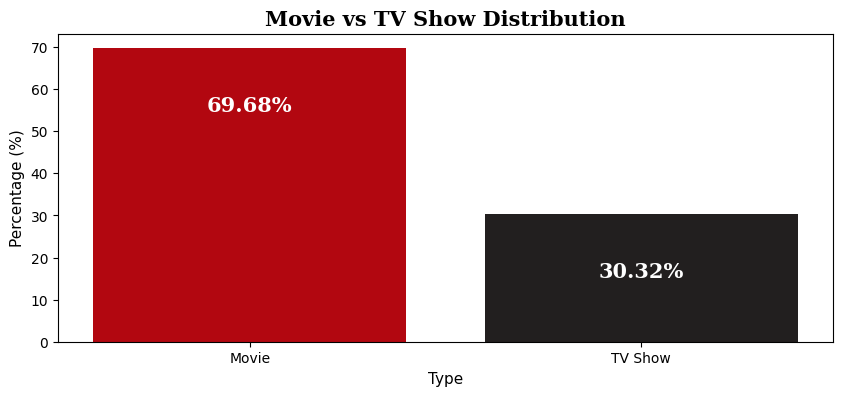

In [65]:

plt.figure(figsize=(10,4))
plt.bar(mf_ratio.index, mf_ratio.values, color=['#b20710', '#221f1f'])


for i, val in enumerate(mf_ratio.values):
    plt.text(i, val - 15, f'{val}%', ha='center', fontsize=15, fontfamily='serif', fontweight='bold',color='white')


plt.title('Movie vs TV Show Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('Percentage (%)', fontsize=11)
plt.xlabel('Type', fontsize=11)
plt.show()


**Observation** :
Our analysis shows that approximately 70% of Netflix’s catalog comprises movies, while TV series account for the remaining 30%.

**Inference**: This distribution highlights Netflix’s strategic preference for films, which are generally faster, more cost-efficient, and easier to license, localize, and distribute across global markets. Focusing on movies allows Netflix to expand its catalog breadth, cater to diverse audience segments, and maintain engagement across regions.

# **Content Upload Timeline**

In [23]:
stream_timeline=df.groupby(["date_added_year_month","type"])["show_id"].count().reset_index().set_index("date_added_year_month")


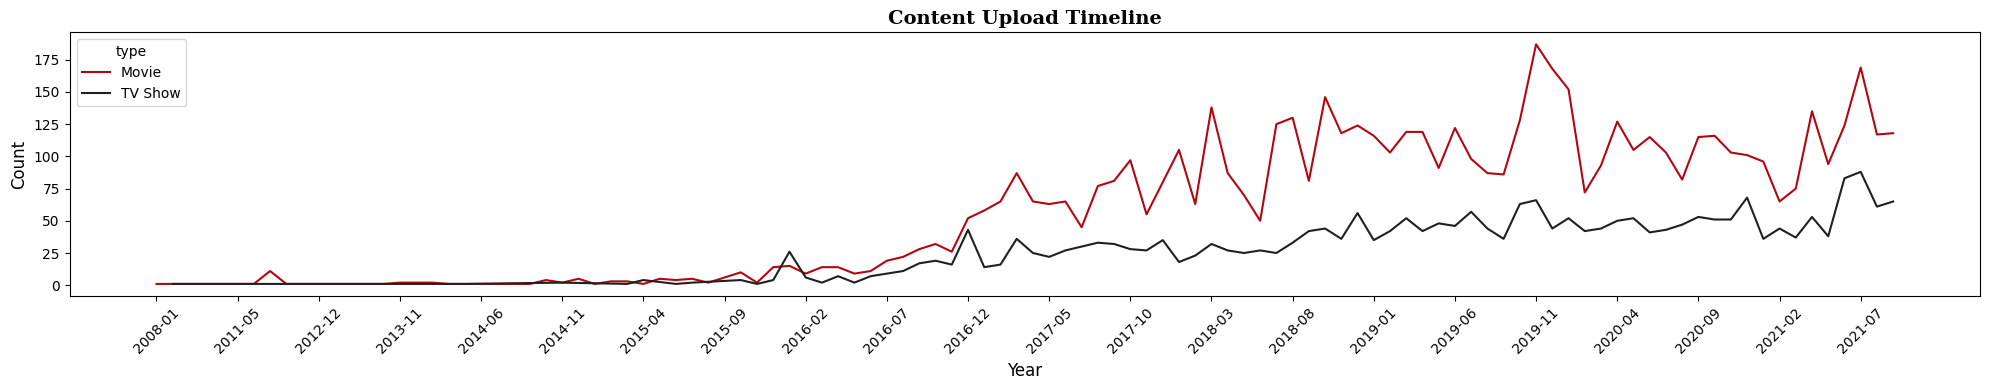

In [66]:
plt.figure(figsize=(20,4))

sns.lineplot(
    data=stream_timeline,
    x="date_added_year_month",
    y="show_id",
    hue="type",
    palette={'Movie': '#b20710', 'TV Show': '#221F1F'}
)

plt.title("Content Upload Timeline", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)


plt.xticks(rotation=45)
plt.gca().set_xticks(plt.gca().get_xticks()[::5])


plt.tight_layout()
plt.show()


**Observation :** While this content split underscores Netflix’s early reliance on movies, the timeline of content additions reveals how this strategy evolved over time. Since 2015, there has been a notable surge in movie releases, far exceeding the growth rate of TV series.
**Inference:** This reflects Netflix’s global expansion phase, during which movies offered the most efficient route to scale enabling rapid catalog diversification and entry into new markets. In contrast, TV series have shown steadier, gradual growth, reflecting a shift in focus toward long-term engagement and subscriber retention as the platform matured.

# **Monthly Distribution of Content Added**

In [25]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

data_sub2 = data_sub

data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()

df_polar = data_sub2.sort_values(by='month_name_added',ascending=False)
df_polar_sorted = df_polar.sort_values(by='Value', ascending=False)
top2 = df_polar_sorted.head(2)['month_name_added'].values

df_polar['Top2'] = df_polar['month_name_added'].apply(lambda x: 'Top2' if x in top2 else 'Other')

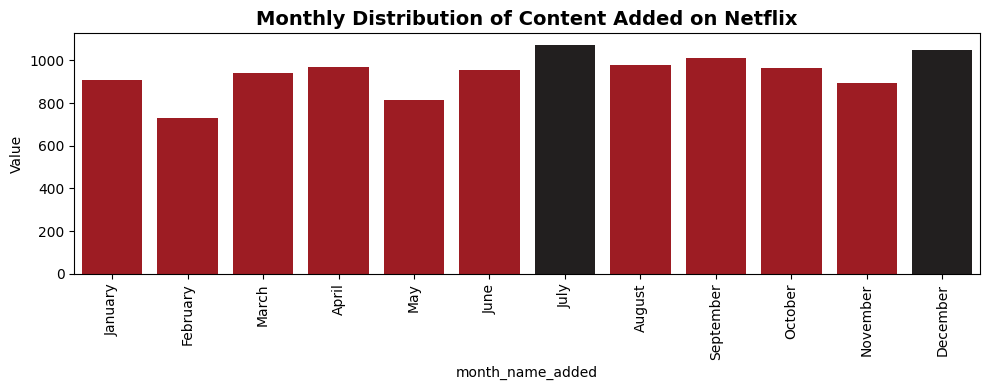

In [26]:

# Define color palette
palette = {'Top2': '#221f1f', 'Other': '#b20710'}

# Plot
plt.figure(figsize=(10, 4))
ax = sns.barplot(
    data=df_polar,
    x='month_name_added',
    y='Value',
    hue='Top2',
    palette=palette,
    dodge=False,
    legend=False
)

plt.xticks(rotation=90)
plt.title('Monthly Distribution of Content Added on Netflix', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()




**Observation :** The number of titles added to Netflix each month remains relatively consistent throughout the year, with slight peaks observed in July and December. February shows the lowest content additions, likely due to fewer calendar days.

**Inference:** The higher upload volumes in July and December may align with mid-year and year-end audience engagement strategies, when viewership typically rises.

# **Netflix Library by Country**

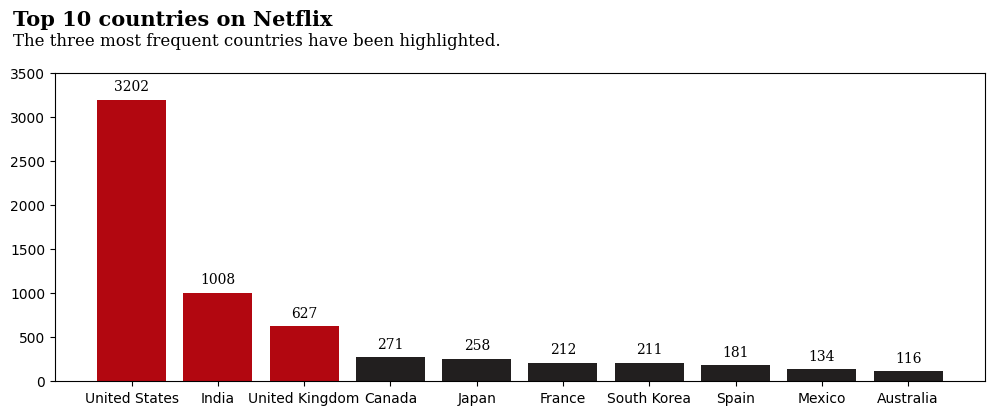

In [67]:
color_map = ['#221F1F' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(country.index, country,linewidth=0.6,color=color_map)

#annotations
for i in country.index:
    ax.annotate(f"{country[i]}",
                   xy=(i, country[i]+150),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',color='black')




# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

**Observation :** The United States leads Netflix’s content catalog with 3,202 titles, followed by India (1,008) and the United Kingdom (627). Other notable contributors include Canada, Japan, France, and South Korea, each producing over 200 titles.

**Inference** : Being Netflix’s home market, the U.S. naturally leads in both the volume and variety of titles, supported by its established entertainment infrastructure and large subscriber base. India and the U.K. rank second and third, respectively, though their title counts remain considerably lower than that of the U.S. However, India’s growing catalog is particularly notable — its vast population, multilingual audience, and diverse storytelling traditions indicate Netflix’s strong emphasis on localization and cultural inclusion rather than dependence on imported content. This strategic focus positions India not only as a key consumer market, but also as a rapidly expanding content production hub with potential to supply both regional and global audiences.


In [44]:
# exclude 'Unknown' before creating crosstab
filtered_df = df[df['first_country'] != 'Unknown']

country_type = pd.crosstab(filtered_df['first_country'], filtered_df['type'])

country_order = filtered_df['first_country'].value_counts().index[:11]
country_type = country_type.loc[country_order]

country_type_ratio = (
    country_type.div(country_type.sum(axis=1), axis=0)
    [['Movie', 'TV Show']]
    .sort_values(by='Movie', ascending=False)
)

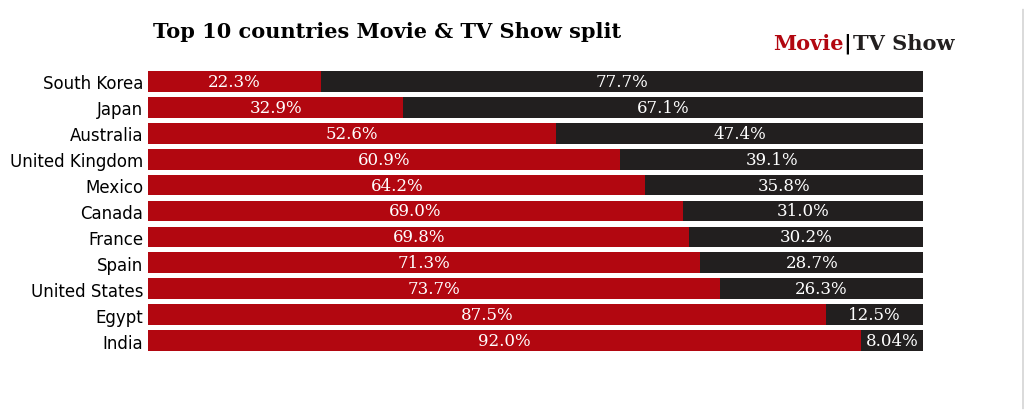

In [68]:
fig, ax = plt.subplots(1,1,figsize=(10, 4),)

ax.barh(country_type_ratio.index, country_type_ratio['Movie'],
        color='#b20710', label='Movie')
ax.barh(country_type_ratio.index, country_type_ratio['TV Show'], left=country_type_ratio['Movie'],
        color='#221f1f', label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])


# male percentage
for i in country_type_ratio.index:
    ax.annotate(f"{country_type_ratio['Movie'][i]*100:.3}%",
                   xy=(country_type_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in country_type_ratio.index:
    ax.annotate(f"{country_type_ratio['TV Show'][i]*100:.3}%",
                   xy=(country_type_ratio['Movie'][i]+country_type_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')


fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.82,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.83,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Observation :**

*   India shows the strongest skew toward movies (≈92%), with a comparatively small share of TV series.
*  The United States, Spain, and France also display a movie-dominant mix, though less extreme.
*   In contrast, South Korea (≈78%) and Japan (≈67%) have a larger share of TV shows, reflecting strong domestic demand for serialized storytelling.

**Inference:** The variation in content mix reflects how Netflix tailors its catalog to the storytelling culture and production maturity of each market. In India, the dominance of films stems from its vibrant cinema ecosystem — led by Bollywood and supported by several regional industries — aligning with Netflix’s strategy of rapidly scaling its library through movies. Meanwhile, South Korea and Japan lean toward TV shows, driven by strong production ecosystems and the global appeal of K-dramas and anime. This approach helps Netflix deepen regional engagement while identifying stories with global crossover potential.




# **Genre Analysis**

In [53]:
ldf=listed_df["listed_in"].value_counts()[:10].reset_index()
mdf=merge_df.loc[merge_df["type"]=="Movie"]["listed_in_y"].value_counts()[:10].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["listed_in_y"].value_counts()[:10].reset_index()

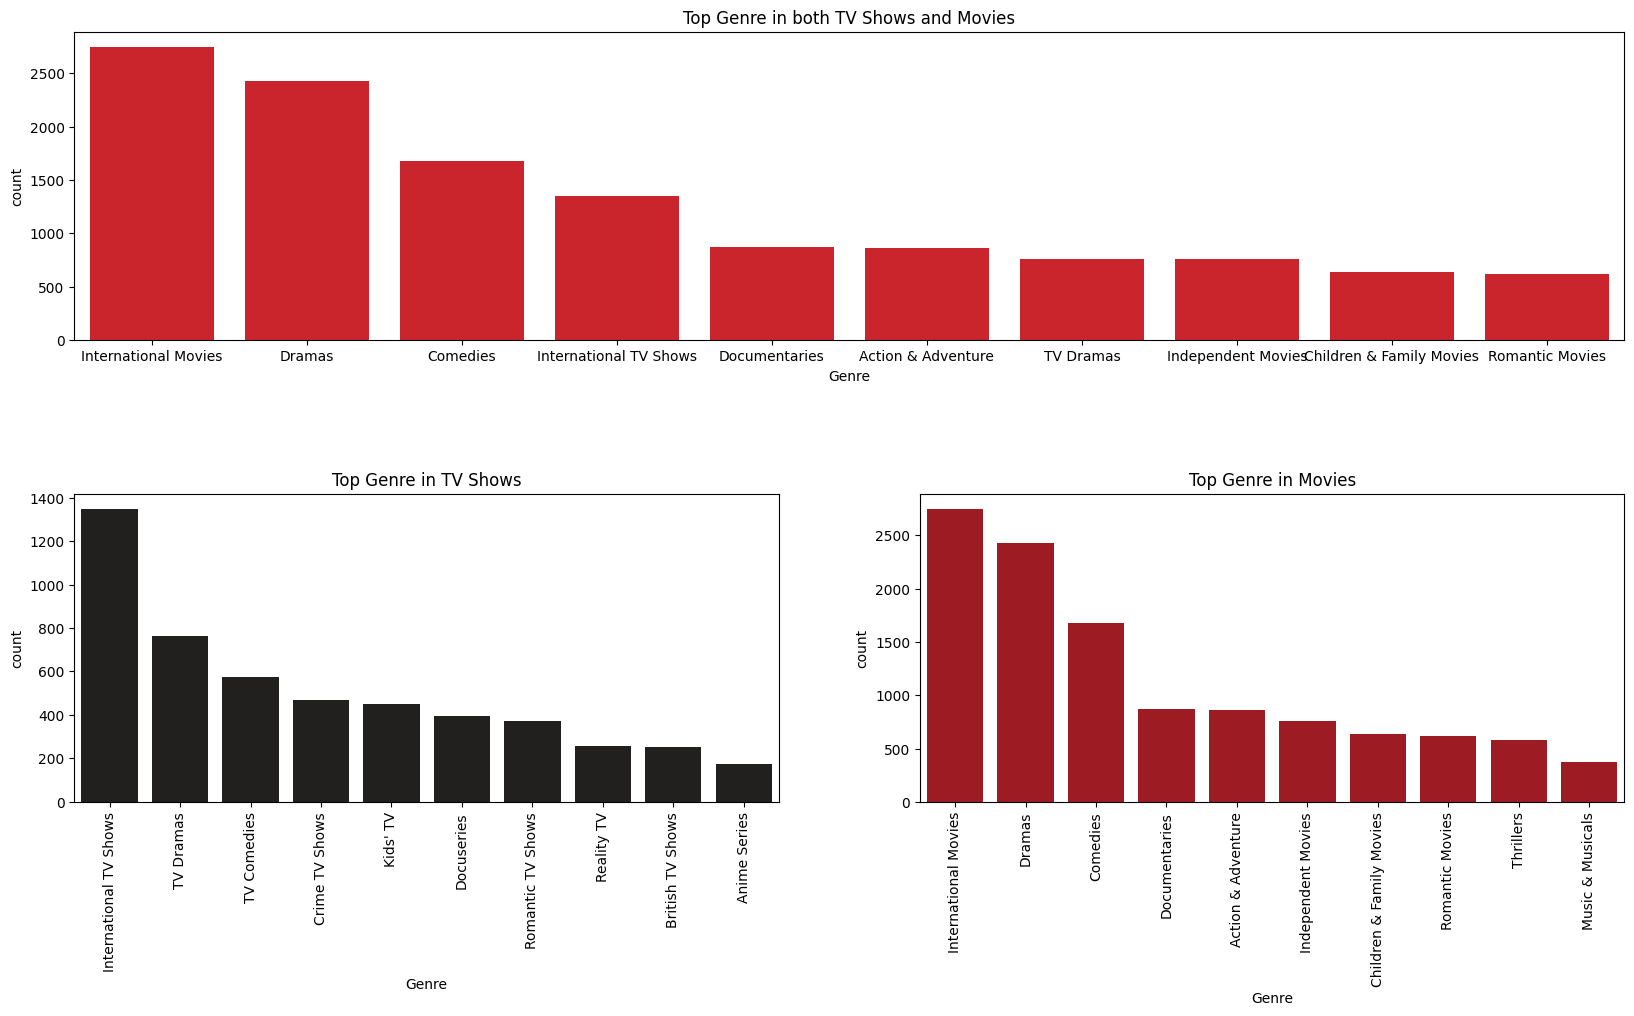

In [32]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ldf, x="listed_in", y="count", ax=ax1,color='#e50914')
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Genre in both TV Shows and Movies")
ax1.set_xlabel("Genre")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="listed_in_y", y="count", ax=ax2,color='#221f1f')
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_title("Top Genre in TV Shows")
ax2.set_xlabel("Genre")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="listed_in_y", y="count", ax=ax3, color='#b20710')
ax3.set_title("Top Genre in Movies")
ax3.tick_params(axis='x', labelrotation=90)
ax3.set_xlabel("Genre");

**Observation:**

Across Netflix’s global catalog, International Movies (2,752 titles), Dramas (2,427), and Comedies (1,674) dominate the platform. Documentaries and Action & Adventure genres also hold a significant share.

When analyzed by content type:
*   **Movies:** Led by International Movies, Dramas, and Comedies, indicating that
Netflix prioritizes universally relatable storytelling and globally licensed titles.
*   **TV Shows:** Dominated by International TV Shows (1,350) and TV Dramas (762), followed by TV Comedies and Crime TV Shows, highlighting the platform’s growing investment in serialized and original storytelling formats.

**Inference :** Netflix positions itself less as a traditional studio and more as a global curator — blending licensed international films with regionally produced series to offer a variety no local competitor can replicate. Its broad spread across genres such as drama, comedy, documentaries, and action reflects a deliberate portfolio diversification strategy — balancing mainstream genres for scale with niche ones for retention, ensuring consistent engagement across diverse audience segments.

# **Duration Analysis**

In [54]:
Movie_duration=films.loc[films['type'] == 'Movie', 'duration']

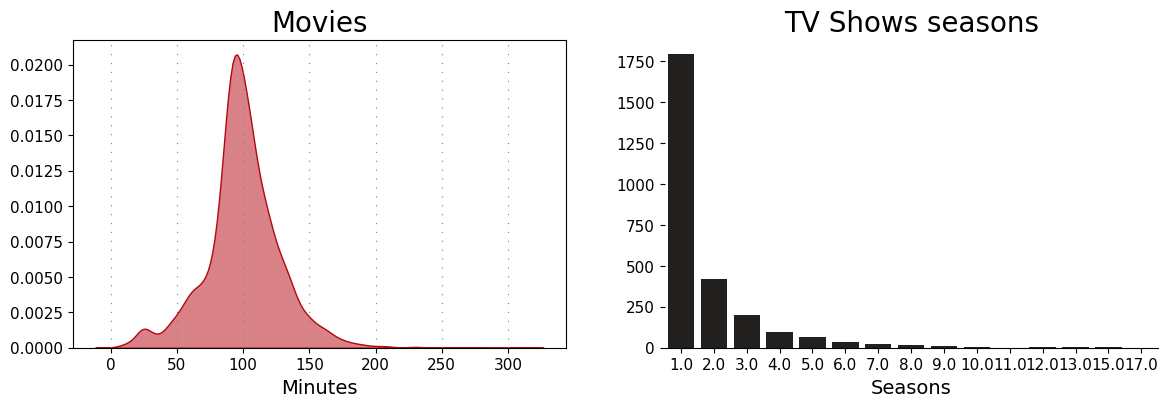

In [69]:
fig = plt.figure(figsize = (14, 4))

plt.subplot(121)
plt.title('Movies', size = 20)
a = sns.kdeplot(films.query('type == "Movie"')['duration'], color = '#b20710', fill=True, alpha=0.5)
a.tick_params(labelsize = 11)
plt.grid(color = 'gray', linestyle = '-', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('Minutes', size = 14)


plt.subplot(122)
plt.title('TV Shows seasons', size = 20)
b = sns.barplot(data = seasons, x = seasons['duration'], y = seasons['title'], color='#221f1f',alpha=1)
b.tick_params(labelsize = 11)
plt.ylabel('')
plt.xlabel('Seasons', size = 14)
for i in ['right', 'left', 'top']:
    b.spines[i].set_visible(False)

plt.show()



**Movies (Duration in Minutes)**

**Observation**: The density plot for movies shows a very strong, highly concentrated peak
*   The vast majority of movies in the Netflix catalog fall into a very narrow range, with a dominant peak likely occurring between 90 and 100 minutes.
*  The distribution drops off sharply after the peak, indicating a low density of both very short films (under 60 minutes) and very long films (over 150 minutes, or 2.5 hours).

**Inference** : Netflix targets films of viewer-friendly lengths, prioritizing content that is both marketable and suited for a single-sitting experience.

**TV Shows (Number of Seasons)**

**Observation**:
*   Season 1.0 dominates the chart, with its count overshadowing all other seasons together
*   The count of shows drops drastically from 1 season to 2 seasons (around 400 titles), and then continues to decline rapidly for 3, 4, and 5+ seasons.

**Inference** :
*   Netflix favors single-season shows to keep viewers engaged and provide complete, binge-ready stories.
*   Renewals are costly, so the platform rotates in new titles, with only a few long-running shows acting as key retention anchors.








# **Rating Analysis**

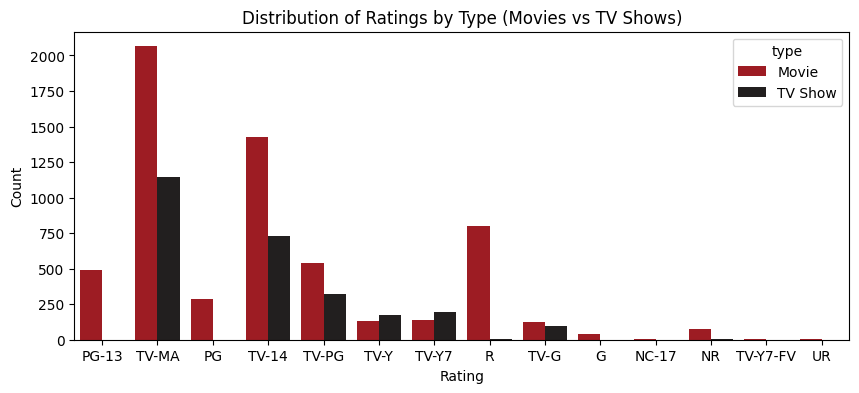

In [70]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="rating", hue="type", palette=['#b20710','#221f1f',])
plt.title("Distribution of Ratings by Type (Movies vs TV Shows)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Observations:**
*  TV-MA is the most common rating for Movies and TV Shows .
*   TV-14 is the second most common rating for Movies and TV Shows. PG-13 movies are also significant .
*   R-rated movies are less common than TV-MA content.
*   Ratings for young children (TV-Y, TV-Y7) make up only a small fraction of the catalog.

**Inferences:**
* Netflix primarily targets adult audiences (18+), producing mature, complex, or explicit content—differentiating itself from family-focused platforms like Disney+.
* Content for teens and young adults (14+) builds a pipeline of viewers who will eventually transition into the adult (TV-MA) demographic.
*  Netflix limits exposure to extreme R-rated content while maintaining some children’s programming, focusing its competitive edge on TV-MA and TV-14 content.

In [36]:
# Netflix-inspired color palette
cmap = cl.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710', '#f5f5f1'])

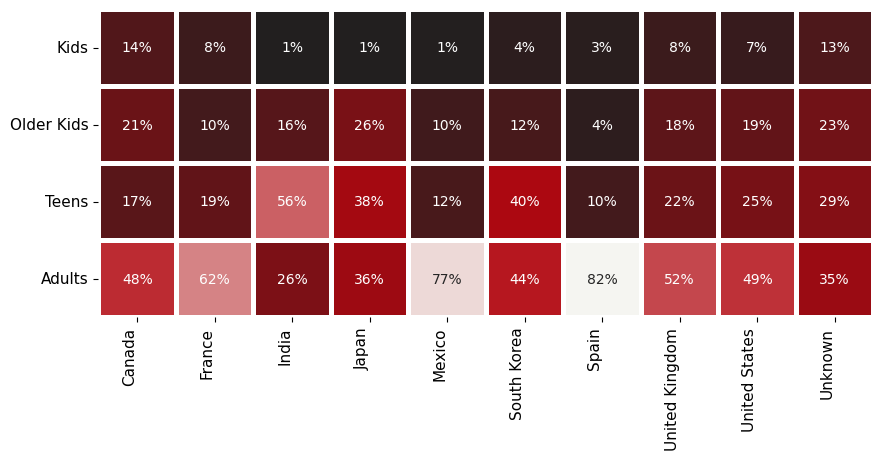

In [71]:
plt.figure(figsize=(10, 4))
sns.heatmap(
    country_age_perc,
    annot=country_age_perc.round(0).astype(int).astype(str) + '%',  # display with %
    fmt="",
    cmap=cmap,
    linewidths=2.5,
    cbar=False
)

plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.show()

**Observation**:


*   Adult (18+) dominance in major markets: Canada (48%), France (62%), Mexico (77%), South Korea (44%), Spain (82%), UK (52%).

*  Focus on Teens and Older Kids in select regions: India – Teens (56%) and Older Kids (16%), Japan – Teens (38%) , south korea - Teens(40%)

**Inference:** While Netflix primarily targets adults globally, it tailors its strategy in regions like India, Japan, and South Korea to engage younger audiences through localized and animation-focused content.

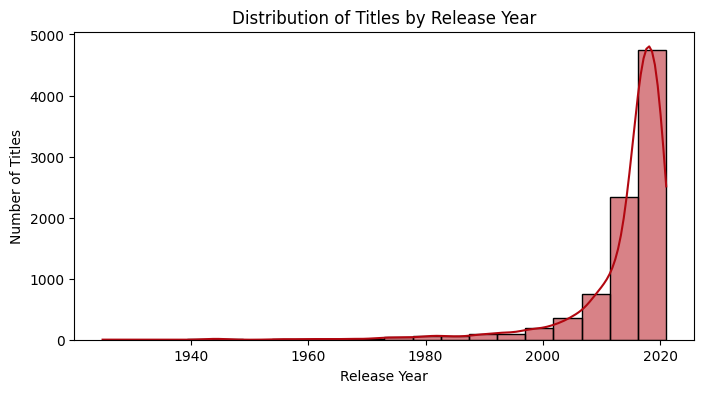

In [72]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='release_year', bins=20, kde=True, color='#b20710')
plt.title("Distribution of Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

**Observation:**
The histogram shows a sharp rise in titles released after 2010, with the highest concentration between 2015 and 2021. Titles from earlier decades (before 2000) are minimal.

**Inference:**
This indicates that Netflix’s catalog primarily consists of modern content, reflecting its strategy of focusing on recent productions and originals. The small number of older titles suggests that legacy content or classic licensing plays a limited role in Netflix’s portfolio.

/tmp/ipython-input-1474733816.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




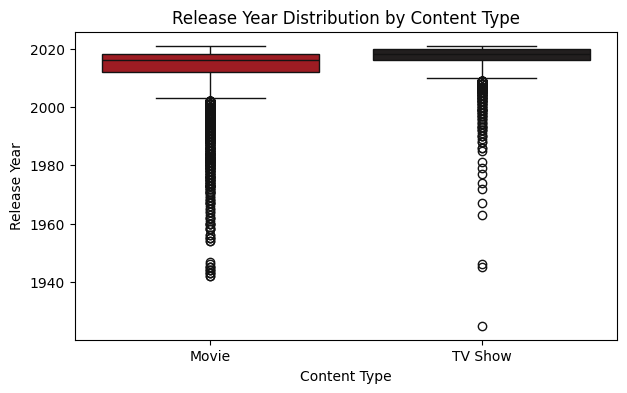

In [73]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='type', y='release_year', palette=['#b20710', '#221f1f'])
plt.title("Release Year Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Release Year")
plt.show()


**Observation:**
Both movies and TV shows exhibit a concentration of release years between 2010 and 2021. However, TV shows show a slightly more recent median release year compared to movies. A few movie titles appear as older outliers, some even dating back to the 1940s–1960s.

**Inference:**
This suggests that while Netflix produces or licenses recent content across both formats, its movie catalog retains a small portion of older films to preserve content diversity. The recency of TV series highlights Netflix’s increased focus on serialized content in the platform’s later years.

In [58]:
ddf = director_df["director"].value_counts()[:11].reset_index()
ddf = ddf.iloc[1:11]
mdf=merge_df1.loc[merge_df1["type"]=="Movie"]["director_y"].value_counts()[1:11].reset_index()
tdf=merge_df1.loc[merge_df1["type"]=="TV Show"]["director_y"].value_counts()[1:11].reset_index()
# Drop any rows where the director is 'Unknown' or NaN
ddf = ddf[~ddf['director'].isin(['Unknown', 'nan', 'NaN'])].copy()
mdf = mdf[~mdf['director_y'].isin(['Unknown', 'nan', 'NaN'])].copy()
tdf = tdf[~tdf['director_y'].isin(['Unknown', 'nan', 'NaN'])].copy()
#Convert to Percentages
ddf["percent"] = (ddf["count"] / len(df)) * 100
mdf["percent"] = (mdf["count"] / len(df[df['type'] == 'Movie'])) * 100
tdf["percent"] = (tdf["count"] / len(df[df['type'] == 'TV Show'])) * 100


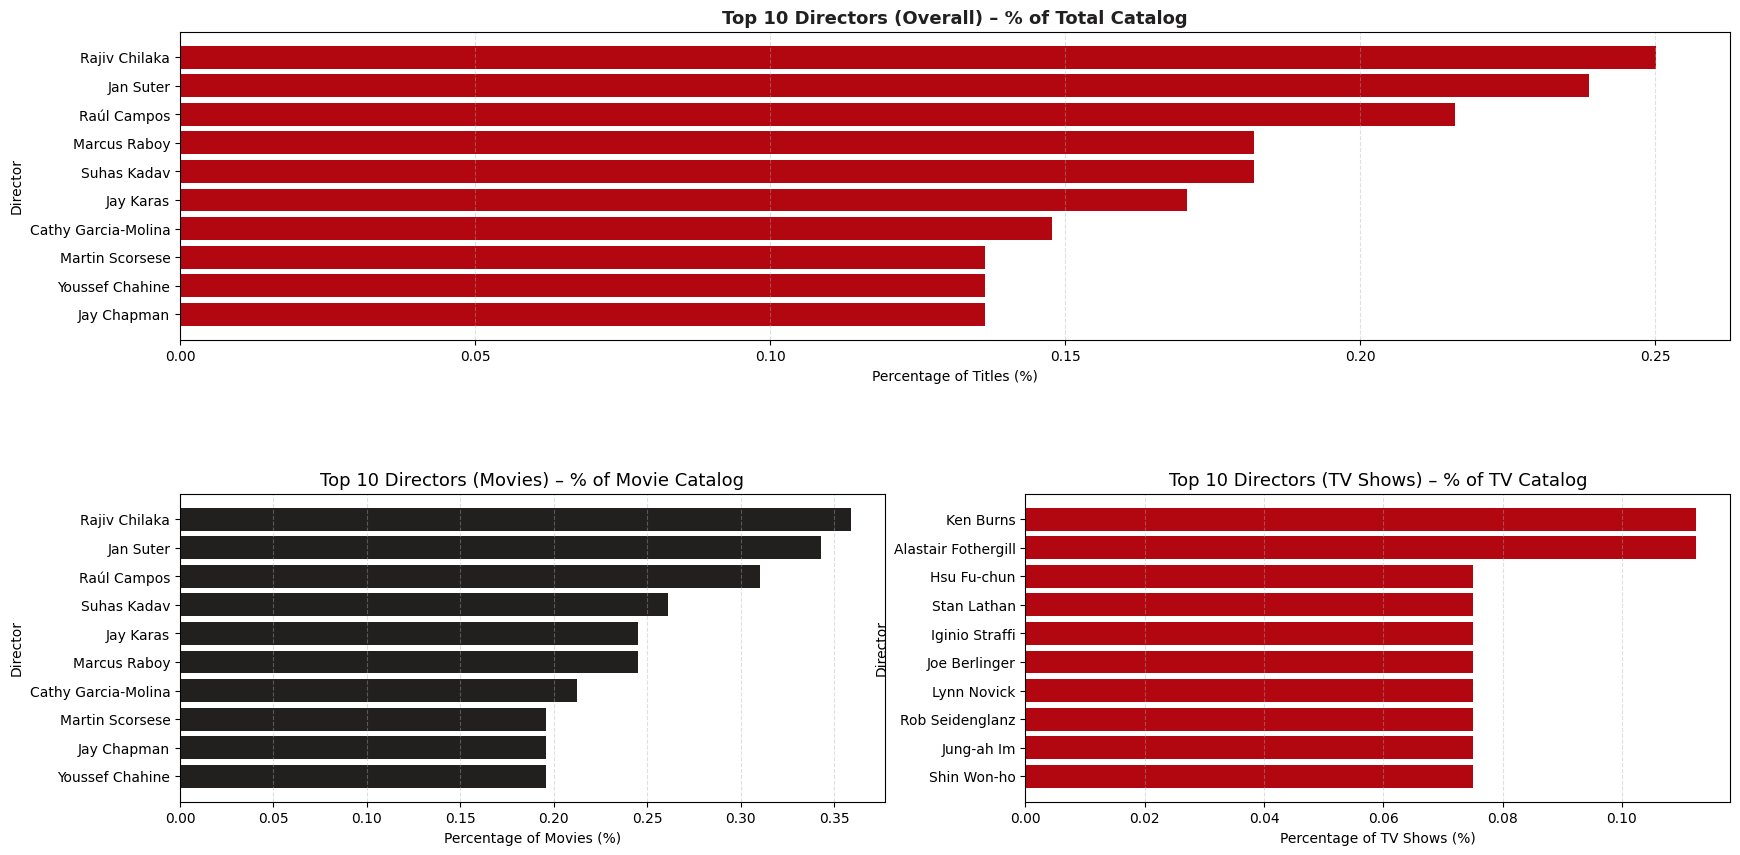

In [61]:
# --- Plot ---
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)

#Overall Directors
ax1 = plt.subplot(gs[0, :])
ax1.barh(ddf['director'][::-1], ddf['percent'][::-1], color='#b20710')
ax1.set_title('Top 10 Directors (Overall) – % of Total Catalog', fontsize=13, fontweight='bold', color='#221f1f')
ax1.set_xlabel('Percentage of Titles (%)')
ax1.set_ylabel('Director')
ax1.grid(axis='x', linestyle='--', alpha=0.4)

#Movie Directors
ax2 = plt.subplot(gs[1, 0])
ax2.barh(mdf['director_y'][::-1], mdf['percent'][::-1], color='#221f1f')
ax2.set_title('Top 10 Directors (Movies) – % of Movie Catalog', fontsize=13, fontweight='light')
ax2.set_xlabel('Percentage of Movies (%)')
ax2.set_ylabel('Director')
ax2.grid(axis='x', linestyle='--', alpha=0.4)

#TV Show Directors
ax3 = plt.subplot(gs[1, 1])
ax3.barh(tdf['director_y'][::-1], tdf['percent'][::-1], color='#b20710')
ax3.set_title('Top 10 Directors (TV Shows) – % of TV Catalog', fontsize=13, fontweight='light')
ax3.set_xlabel('Percentage of TV Shows (%)')
ax3.set_ylabel('Director')
ax3.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()


**Observation:**
There are 2,634 titles with unknown directors, accounting for roughly 28% of the total catalog. Among the identified directors, Rajiv Chilaka has directed the highest number of movies (22 titles), while ken burns and Alastair Fothergill leads the TV category with 3 shows.

**Inference:**
Despite a sizable portion of titles lacking listed directors, the data shows that no single director dominates Netflix’s catalog. the top contributors represent less than 0.3% of total titles. This indicates that Netflix collaborates with a highly diverse and decentralized director base, reflecting its strategy to source content from a wide range of creators and production houses worldwide.

# **Business Insights**

Analysis of the catalog data reveals that our library is predominantly composed of Movies (70%), with most TV Shows consisting of just a single season. While the majority of content originates from the United States, the library showcases remarkable global diversity, spanning 749 unique countries. Notably, the collection heavily targets mature audiences, with 'TV-MA' as the most common rating and 'Dramas, International Movies' as the prevailing genre combination. The median release year of 2017 indicates a strong focus on contemporary content. Additionally, Netflix works with a highly diverse and decentralized pool of directors.

# **Recommendation**



*   As observed, Netflix’s strategy has largely centered on customer acquisition — expanding its catalog breadth across 190 countries with a strong concentration in movies and limited-series content. However, to strengthen long-term retention, the platform should strategically expand its multi-season TV series portfolio. Serialized storytelling not only sustains viewer engagement but also builds deeper emotional investment, driving consistent platform loyalty over time.

*  Netflix should strategically expand specialized regional content hubs, focusing on markets that demonstrate both high content output and growth potential. For instance, India, which ranks second after the U.S. in total titles and is the world’s most populous market, offers vast opportunities for customer acquisition. Its rich multilingual and cultural diversity enables content that can engage domestic audiences while also creating global crossover potential — reinforcing Netflix’s already dominant International Movies genre. Similarly, investing further in Japan and South Korea, known for their globally popular anime and K-dramas, can strengthen Netflix’s regional foothold while fueling cross-market appeal.

*   Netflix’s catalog is heavily skewed toward modern releases, with limited representation of classic or cult films. While this approach helps differentiate the platform through fresh and exclusive content, it also leaves a gap in nostalgia-driven engagement. Reintroducing or licensing select timeless classics could strengthen viewer loyalty by offering the comfort and familiarity of rewatchable favorites. a proven lever for customer retention in mature streaming markets.

*   One area where Netflix can further differentiate itself in the streaming landscape is through its growing catalog of documentaries and educational content  currently around 869 titles, ranking among the platform’s top five genres. Strengthening this segment can attract a new audience base seeking content that informs as well as entertains. By investing in more knowledge-driven, real-world, and thought-provoking content, Netflix can position itself as not just an entertainment leader but also a destination for learning and awareness.



